In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d=pd.read_csv("/content/indian_liver_patient.csv")
d

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [3]:
d.shape


(583, 11)

In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alanine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Proteins              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
d.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


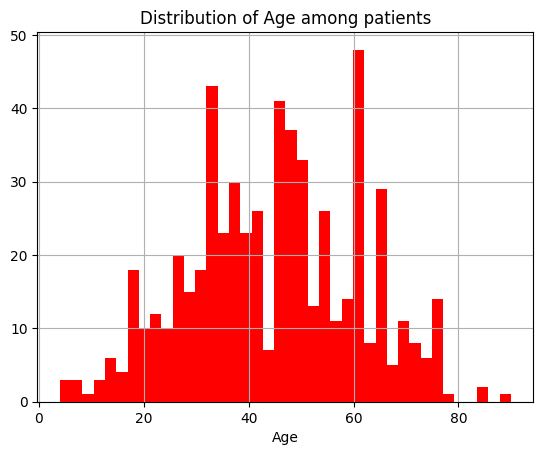

In [6]:
d['Age'].hist(bins=40, color='red')
plt.title("Distribution of Age among patients")
plt.xlabel("Age");

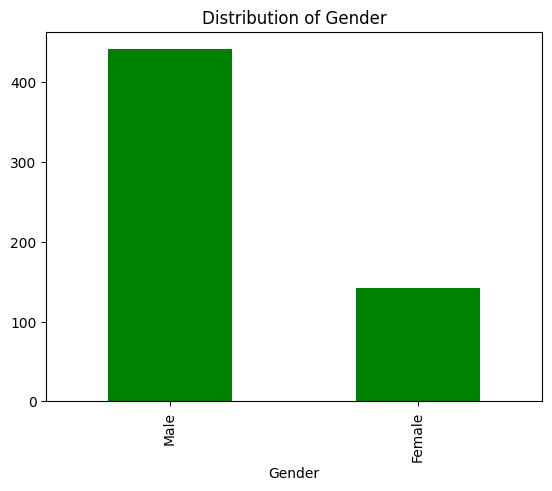

In [7]:
d['Gender'].value_counts().plot.bar(color='green')
plt.title("Distribution of Gender");

In [8]:
d.rename(columns={'Dataset': 'Diagnosis'}, inplace=True)

d['Diagnosis'] = d['Diagnosis'].apply(lambda x:1 if x==1 else 0)

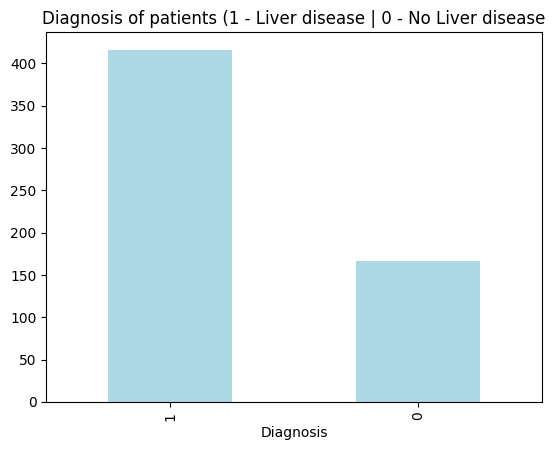

In [9]:
d['Diagnosis'].value_counts().plot.bar(color='lightblue')
plt.title('Diagnosis of patients (1 - Liver disease | 0 - No Liver disease');

In [10]:
d.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alanine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Proteins,0
Albumin,0
Albumin_and_Globulin_Ratio,4


In [11]:
mean_ratio = d['Albumin_and_Globulin_Ratio'].mean()
mean_ratio

np.float64(0.9470639032815197)

In [12]:
d = d.fillna(mean_ratio)

In [13]:
d.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alanine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Proteins,0
Albumin,0
Albumin_and_Globulin_Ratio,0


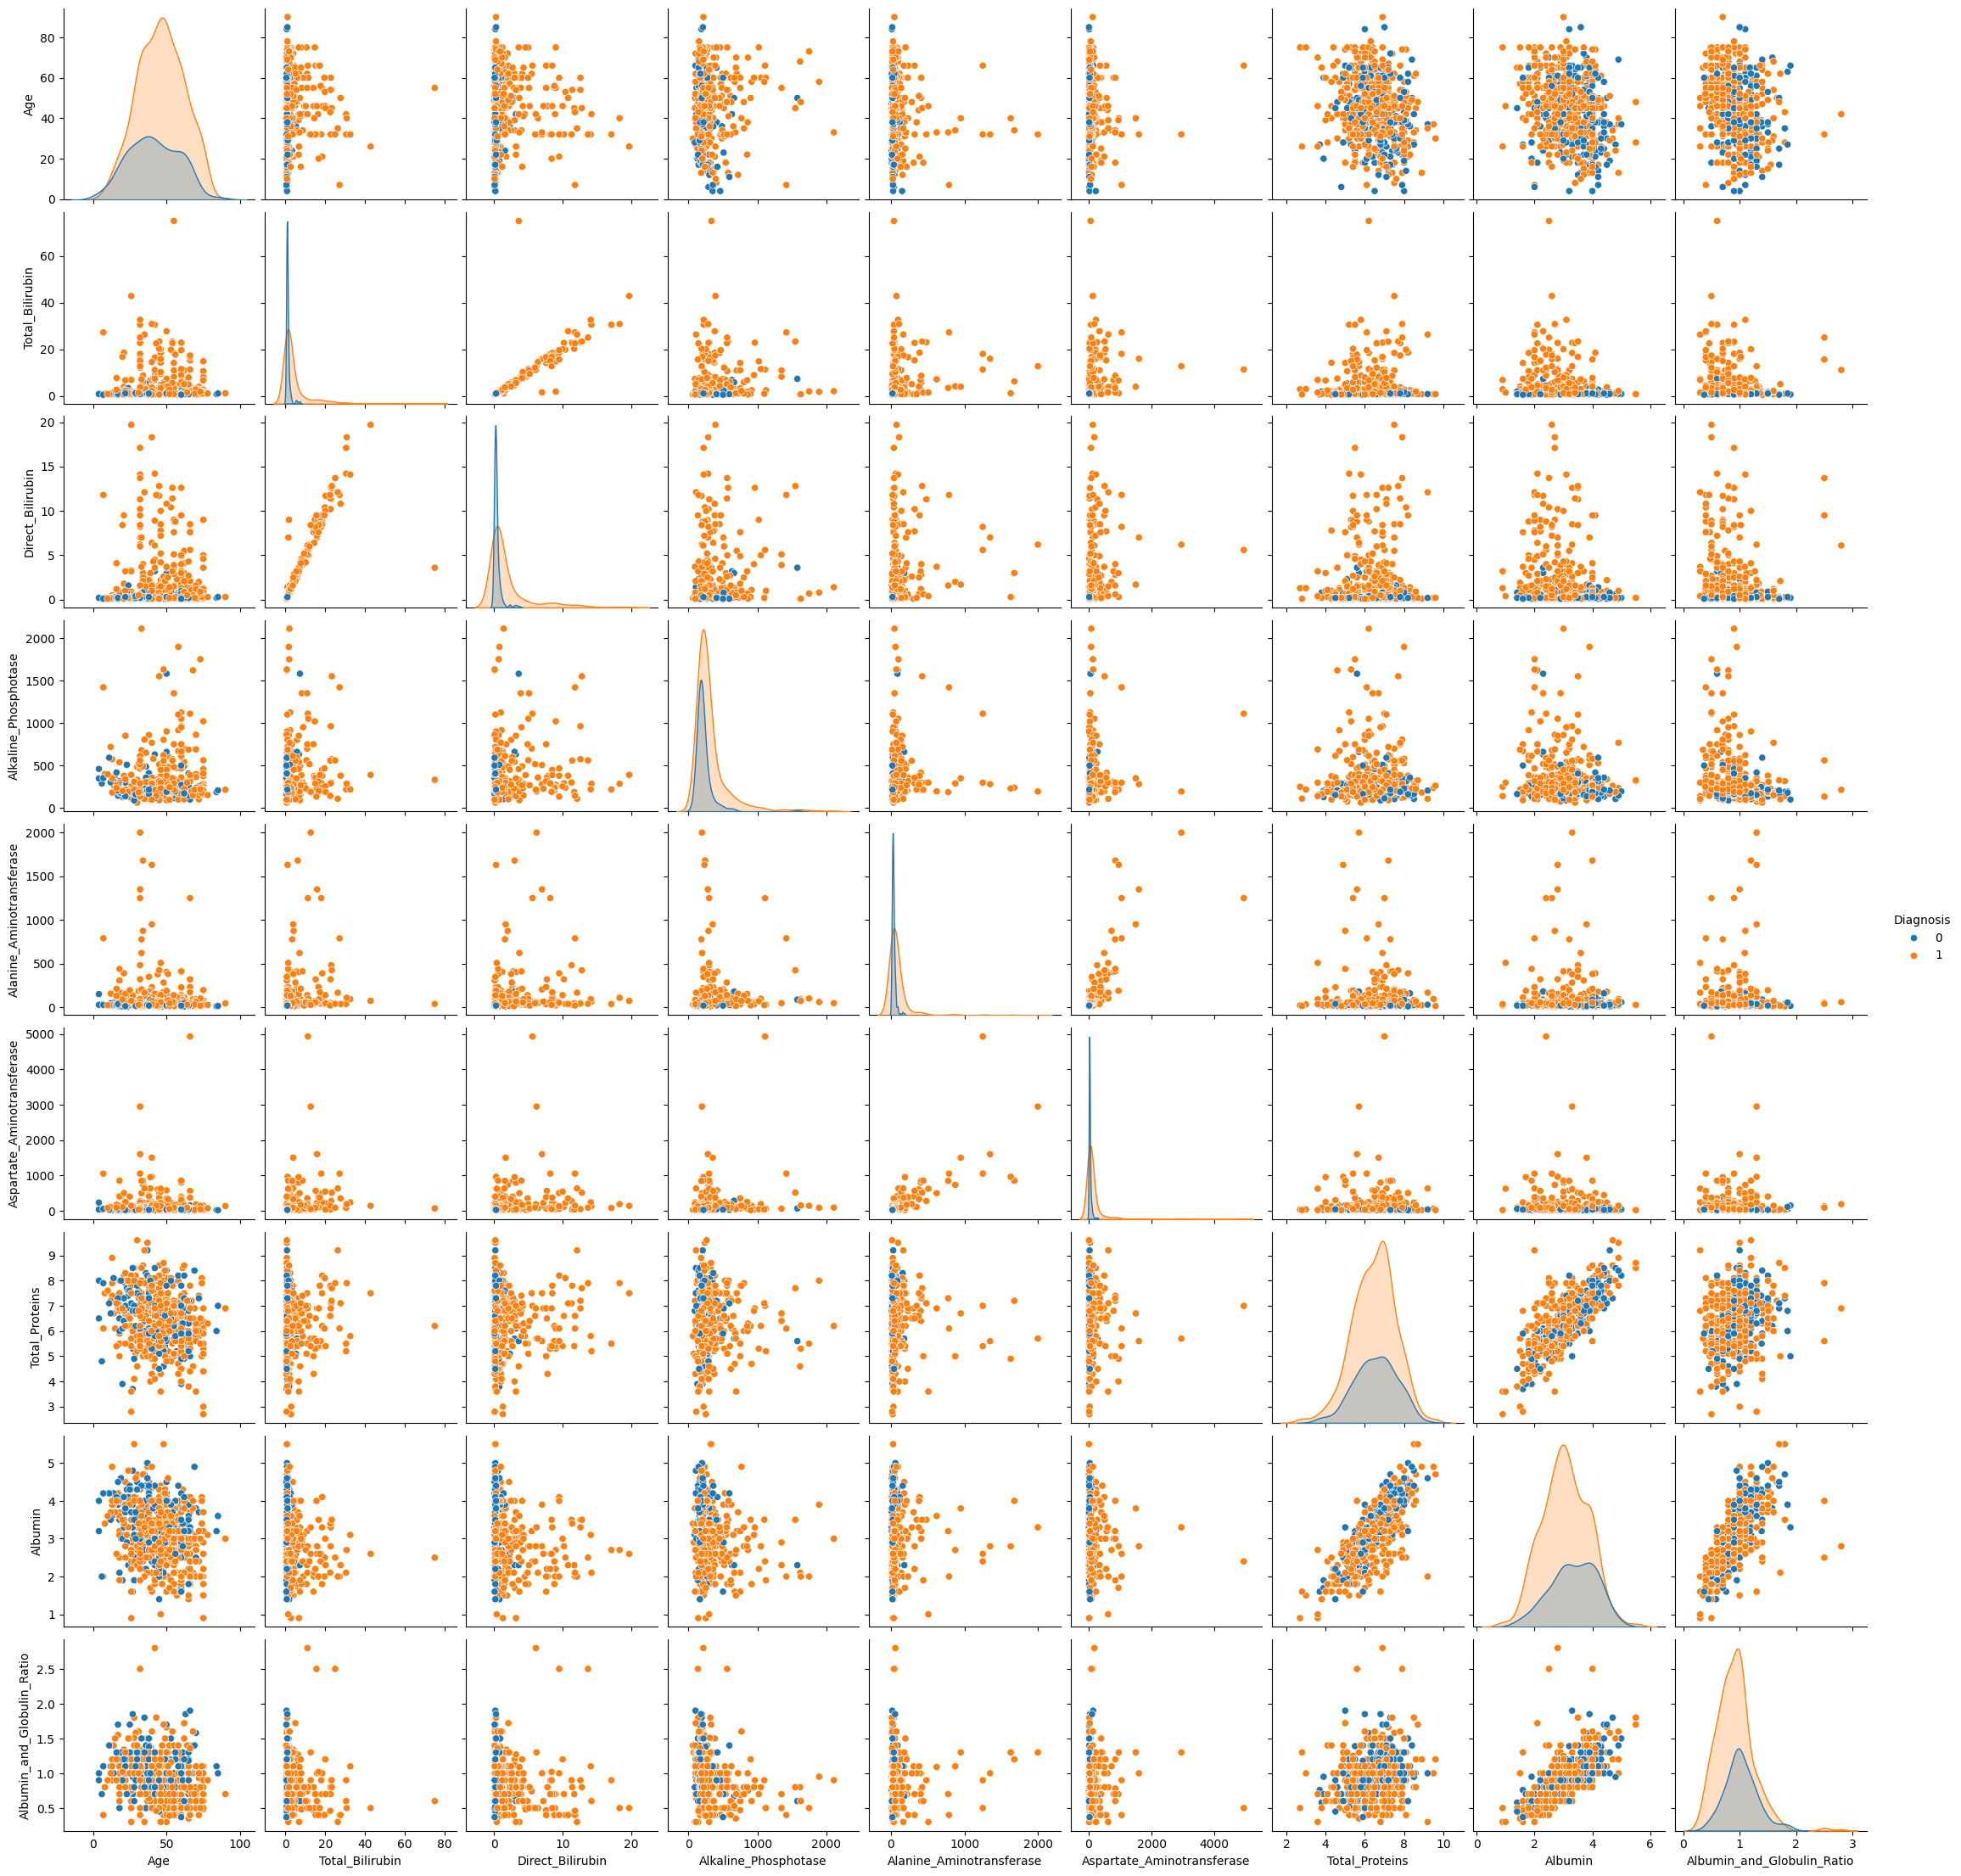

In [14]:
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(d,hue='Diagnosis')

In [15]:
d['Gender'] = d['Gender'].apply(lambda x:1 if x=='Male' else 0)

d.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Diagnosis
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<Axes: >

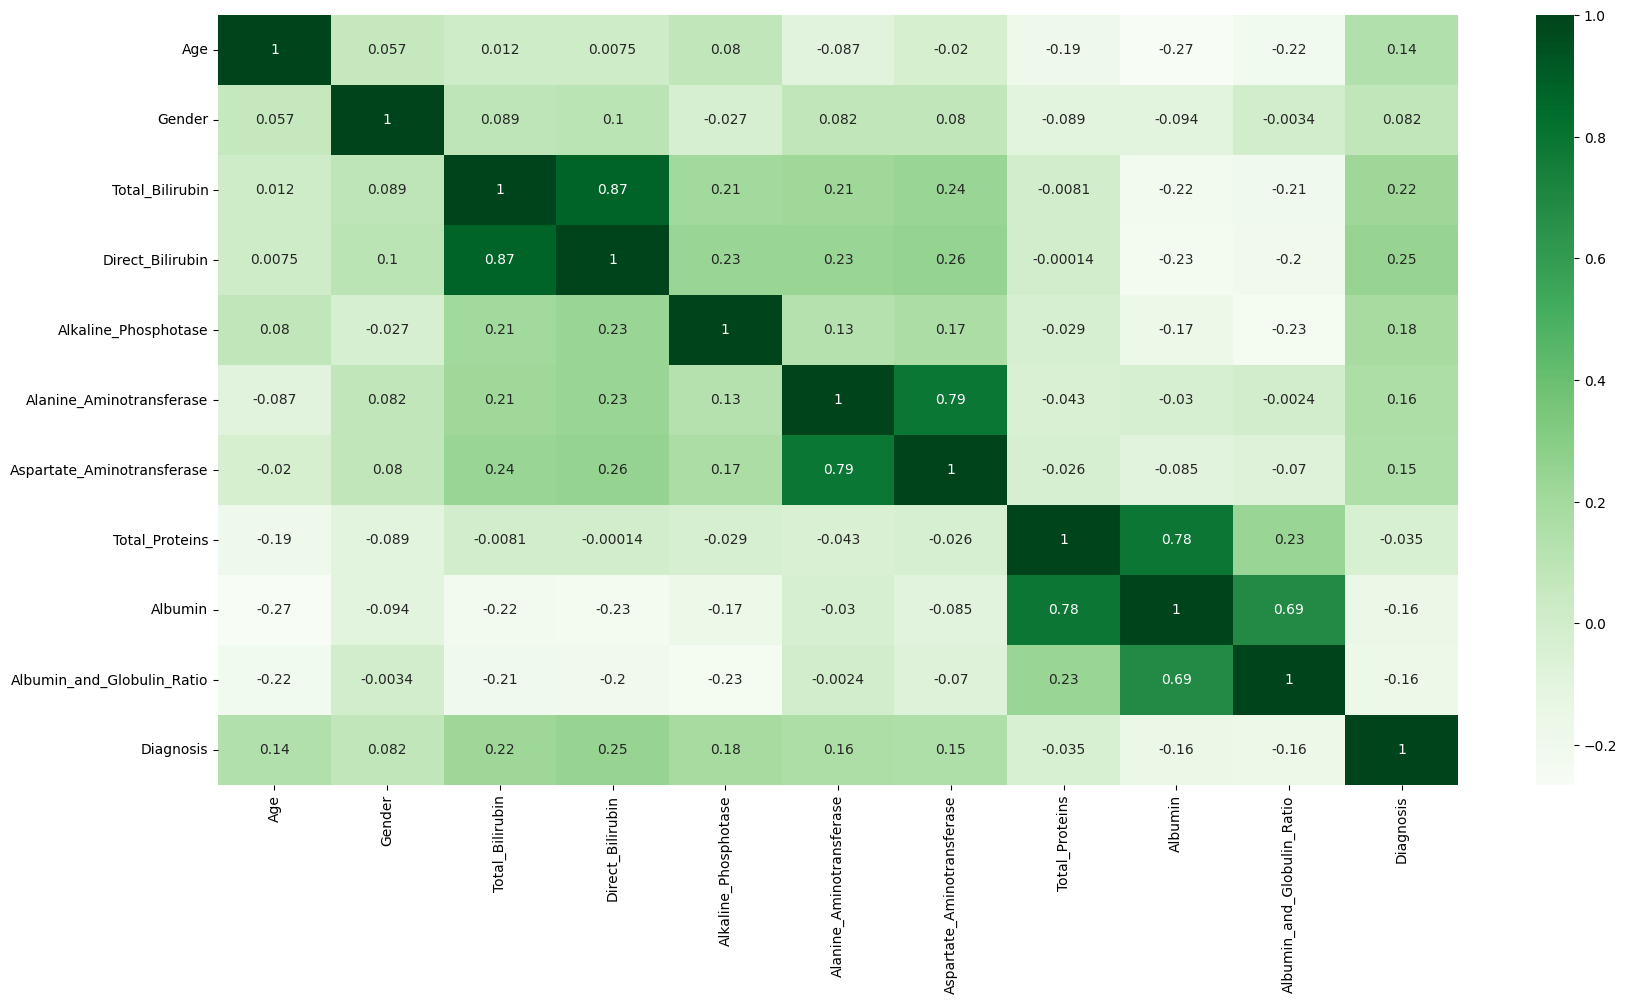

In [16]:
corr=d.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,cmap="Greens",annot=True)

In [17]:
d.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alanine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Diagnosis'],
      dtype='object')

In [18]:
X = d.drop('Diagnosis', axis=1)
y = d['Diagnosis']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [21]:
from sklearn.metrics import accuracy_score, classification_report

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold

# Define your model
svm_classifier = SVC(kernel='rbf', C=100, gamma=0.0001)

# Define the k-fold cross-validator
k = 5  # number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_val_score(svm_classifier, X_train, y_train, cv=kf, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation accuracy scores for each fold: {cv_results}")
print(f"Mean cross-validation accuracy: {cv_results.mean()}")

# Fit the model on the entire training data
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy}")

# Print classification report
print(classification_report(y_test, y_pred))

Cross-validation accuracy scores for each fold: [0.72340426 0.72043011 0.68817204 0.72043011 0.65591398]
Mean cross-validation accuracy: 0.7016700983756577
Accuracy on test set: 0.7606837606837606
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.76      1.00      0.86        89

    accuracy                           0.76       117
   macro avg       0.38      0.50      0.43       117
weighted avg       0.58      0.76      0.66       117



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report

# Define your model
knn_classifier2 = KNeighborsClassifier(n_neighbors=4, metric="manhattan")

# Define the k-fold cross-validator
k = 5  # number of folds
kf2 = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation
cv_results2 = cross_val_score(knn_classifier2, X_train, y_train, cv=kf2, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation accuracy scores for each fold: {cv_results2}")
print(f"Mean cross-validation accuracy: {cv_results2.mean()}")

# Fit the model on the entire training data
knn_classifier2.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_classifier2.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy}")

# Print classification report
print(classification_report(y_test, y_pred))

Cross-validation accuracy scores for each fold: [0.5        0.65591398 0.60215054 0.56989247 0.61290323]
Mean cross-validation accuracy: 0.5881720430107527
Accuracy on test set: 0.6495726495726496
              precision    recall  f1-score   support

           0       0.36      0.61      0.45        28
           1       0.84      0.66      0.74        89

    accuracy                           0.65       117
   macro avg       0.60      0.64      0.60       117
weighted avg       0.73      0.65      0.67       117



In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
# Define your model
param_grid = [ {'activation' : [ 'tanh', 'sigmoidal'],
            'hidden_layer_sizes': [(11,),(9,), (1,)]} ]

clf = GridSearchCV(MLPClassifier(), param_grid, cv=3,
                           scoring='accuracy')
clf.fit(X,y)

model_MLP = MLPClassifier()

# Define the k-fold cross-validator
k = 5  # number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_val_score(model_MLP, X_train, y_train, cv=kf, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation accuracy scores for each fold: {cv_results}")
print(f"Mean cross-validation accuracy: {cv_results.mean()}")

# Fit the model on the entire training data
model_MLP.fit(X_train, y_train)

# Predict on the test set
y_pred = model_MLP.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy}")

# Print classification report
print(classification_report(y_test, y_pred))
print("Best parameters set found on development set:")
print(clf.best_params_)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

Cross-validation accuracy scores for each fold: [0.65957447 0.79569892 0.64516129 0.72043011 0.66666667]
Mean cross-validation accuracy: 0.6975062914664837
Accuracy on test set: 0.7264957264957265
              precision    recall  f1-score   support

           0       0.40      0.29      0.33        28
           1       0.79      0.87      0.83        89

    accuracy                           0.73       117
   macro avg       0.60      0.58      0.58       117
weighted avg       0.70      0.73      0.71       117

Best parameters set found on development set:
{'activation': 'tanh', 'hidden_layer_sizes': (11,)}


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, KFold

# Define your individual classifiers


# Define your VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('svc', svm_classifier),
        ('knn', knn_classifier),
        ('mlp', model_MLP)
    ],
    voting='hard'
)

# Define the k-fold cross-validator
k = 5  # number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_val_score(voting_clf, X_train, y_train, cv=kf, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation accuracy scores for each fold: {cv_results}")
print(f"Mean cross-validation accuracy: {cv_results.mean()}")

# Fit the model on the entire training data
voting_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = voting_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy}")

# Print parameters of the Voting Classifier model
print(f"Parameters of the Voting Classifier model: {voting_clf.get_params()}")

# Print classification report
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

Cross-validation accuracy scores for each fold: [0.64893617 0.78494624 0.67741935 0.7311828  0.66666667]
Mean cross-validation accuracy: 0.7018302447952413
Accuracy on test set: 0.717948717948718
Parameters of the Voting Classifier model: {'estimators': [('svc', SVC(C=100, gamma=0.0001)), ('knn', KNeighborsClassifier(metric='euclidean', n_neighbors=4)), ('mlp', MLPClassifier())], 'flatten_transform': True, 'n_jobs': None, 'verbose': False, 'voting': 'hard', 'weights': None, 'svc': SVC(C=100, gamma=0.0001), 'knn': KNeighborsClassifier(metric='euclidean', n_neighbors=4), 'mlp': MLPClassifier(), 'svc__C': 100, 'svc__break_ties': False, 'svc__cache_size': 200, 'svc__class_weight': None, 'svc__coef0': 0.0, 'svc__decision_function_shape': 'ovr', 'svc__degree': 3, 'svc__gamma': 0.0001, 'svc__kernel': 'rbf', 'svc__max_iter': -1, 'svc__probability': False, 'svc__random_state': None, 'svc__shrinking': True, 'svc__tol': 0.001, 'svc__verbose': False, 'knn__algorithm': 'auto', 'knn__leaf_size': 30,

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
!pip install deap
import random
from deap import base, creator, tools, algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle  # To save the best hyperparameters

# Define the fitness function
def evaluate_model(individual):
    n_estimators = int(individual[0])
    max_depth = int(individual[1])
    min_samples_split = int(individual[2])

    rf = RandomForestClassifier(n_estimators=n_estimators,
                                max_depth=max_depth,
                                min_samples_split=min_samples_split,
                                random_state=21)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy,

# Define the genetic algorithm parameters
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_int", random.randint, 10, 200)
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_int, toolbox.attr_int, toolbox.attr_int), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate_model)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=10, up=200, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

# Create the population
pop = toolbox.population(n=50)

# Run the genetic algorithm
NGEN = 30
CXPB = 0.8
MUTPB = 0.2

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN,
                                 stats=None, halloffame=None, verbose=False)

# Get the best individual
best_ind = tools.selBest(pop, 1)[0]

# Save the best hyperparameters
best_hyperparams = {
    "n_estimators": int(best_ind[0]),
    "max_depth": int(best_ind[1]),
    "min_samples_split": int(best_ind[2])
}

with open("best_rf_params.pkl", "wb") as f:
    pickle.dump(best_hyperparams, f)

print("Best Hyperparameters Found:", best_hyperparams)


/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Best Hyperparameters Found: {'n_estimators': 45, 'max_depth': 36, 'min_samples_split': 150}


Accuracy: 0.7777777777777778
              precision    recall  f1-score   support

           0       1.00      0.07      0.13        28
           1       0.77      1.00      0.87        89

    accuracy                           0.78       117
   macro avg       0.89      0.54      0.50       117
weighted avg       0.83      0.78      0.70       117



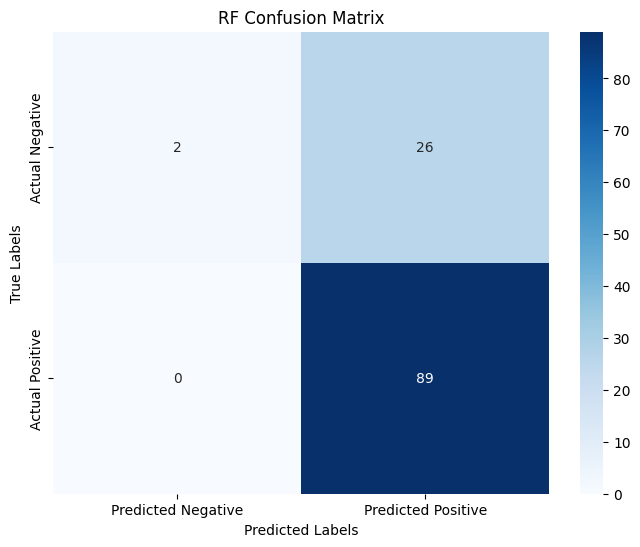

In [33]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the best hyperparameters
with open("best_rf_params.pkl", "rb") as f:
    best_hyperparams = pickle.load(f)

n_estimators = best_hyperparams["n_estimators"]
max_depth = best_hyperparams["max_depth"]
min_samples_split = best_hyperparams["min_samples_split"]

# Train the model with the best hyperparameters
rf_best = RandomForestClassifier(n_estimators=n_estimators,
                                 max_depth=max_depth,
                                 min_samples_split=min_samples_split,
                                 random_state=21)
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)

# Print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create the heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

# Set labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('RF Confusion Matrix')

# Display the plot
plt.show()


Accuracy: 0.7606837606837606
              precision    recall  f1-score   support

           0       0.50      0.14      0.22        28
           1       0.78      0.96      0.86        89

    accuracy                           0.76       117
   macro avg       0.64      0.55      0.54       117
weighted avg       0.71      0.76      0.71       117



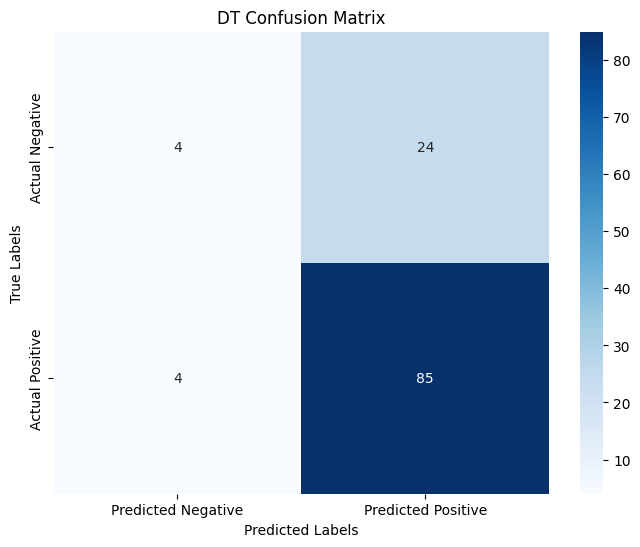

In [36]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the best hyperparameters
with open("best_rf_params.pkl", "rb") as f:
    best_hyperparams = pickle.load(f)

max_depth = best_hyperparams["max_depth"]
min_samples_split = best_hyperparams["min_samples_split"]
# Use a default criterion or specify one explicitly for DecisionTree
criterion = 'gini'  # or 'entropy'

# Train the Decision Tree with the best parameters
dt_best = DecisionTreeClassifier(max_depth=max_depth,
                                 min_samples_split=min_samples_split,
                                 criterion=criterion, # Use the defined or default criterion
                                 random_state=21)
dt_best.fit(X_train, y_train)
y_pred = dt_best.predict(X_test)

# Print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create the heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

# Set labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('DT Confusion Matrix')

# Display the plot
plt.show()

Accuracy: 0.7264957264957265
              precision    recall  f1-score   support

           0       0.38      0.21      0.27        28
           1       0.78      0.89      0.83        89

    accuracy                           0.73       117
   macro avg       0.58      0.55      0.55       117
weighted avg       0.68      0.73      0.70       117



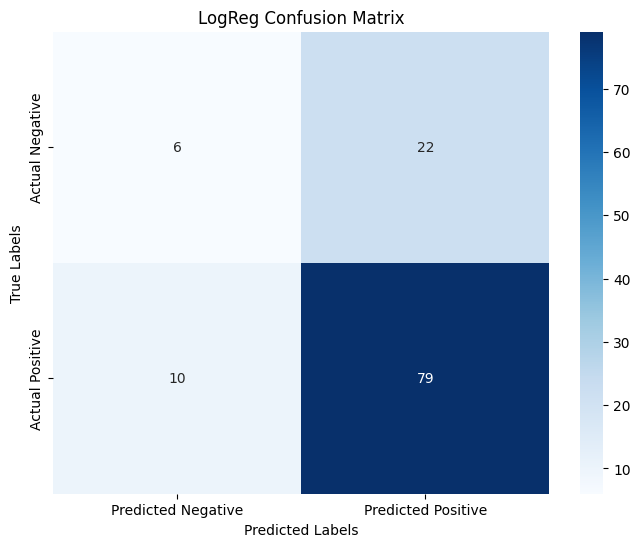

In [38]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instead of loading from 'best_rf_params.pkl', you might need to:
# 1. Either perform hyperparameter tuning for Logistic Regression separately
#    and save the results to a different file (e.g., 'best_lr_params.pkl').
# 2. Or, if you intend to use some default values for Logistic Regression,
#    set them directly instead of trying to load them from the RF parameters.

# Example of setting default values:
C = 1.0  # Default regularization strength
penalty = 'l2'  # Default penalty type
solver = 'lbfgs'  # Suitable solver for l2 penalty

# Train the Logistic Regression model with the best parameters
lr_best = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=1000, random_state=21)
lr_best.fit(X_train, y_train)
y_pred = lr_best.predict(X_test)

# Print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create the heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

# Set labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('LogReg Confusion Matrix')

# Display the plot
plt.show()